In [1]:
import mnist_util as mu
import numpy as np

train, train_labels, test, test_labels = mu.get_np_array()

showing picture number: 52357


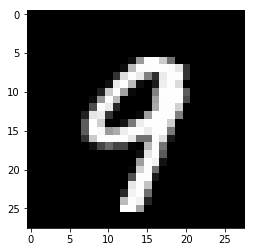

In [2]:
from random import randint
%matplotlib inline

rnd = randint(0, len(train)-1)
print("showing picture number: {rnd}".format(rnd=rnd))
mu.show_a_num(train[rnd])

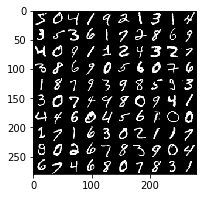

In [164]:
testing = train[:100]
mu.show_nums(testing, square=True, xsize=3, ysize=3)

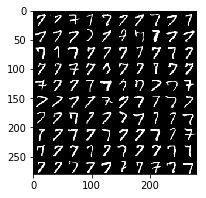

In [165]:
num_arrays = mu.get_all_nums(train, train_labels)
num = num_arrays[7]
mu.show_nums(num[:100], square=True, xsize=3, ysize=3)

In [163]:
from scipy.stats import multivariate_normal

mys = [np.mean(num_arrays[i], axis=0) for i in range(10)]

sigma_id  = np.identity(784)
sigma_var = [np.var(num_arrays[i]) for i in range(10)]
sigma_cov = [np.cov(num_arrays[i].T) for i in range(10)]

p_id  = [multivariate_normal(mean=mys[i], cov=sigma_id)     for i in range(10)]
p_var = [multivariate_normal(mean=mys[i], cov=sigma_var[i]) for i in range(10)]
p_cov = [multivariate_normal(mean=mys[i], cov=sigma_cov[i], allow_singular=True) for i in range(10)]

ValueError: operands could not be broadcast together with shapes (200,200,2) (784,) 

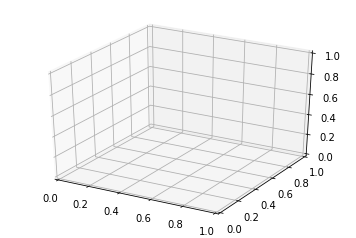

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p0_id  = p_id[0]
p0_var = p_var[0]
p0_cov = p_cov[0]

X, Y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, p0_id.logpdf(pos),cmap='viridis',linewidth=0)

In [166]:
for i in range(10):
    print("Logpdf of number {num}".format(num=i))
    print(p_id[i].logpdf(test[0]))
    print(p_var[i].logpdf(test[0]))
    print(p_cov[i].logpdf(test[0]))
    print()
print("Number is {}".format(test_labels[0]))

Logpdf of number 0
-2356569.03402
-4536.2583174
-5584.07995324

Logpdf of number 1
-2013992.94458
-4478.65120041
-48275.1532546

Logpdf of number 2
-2003728.14354
-4475.84372955
-11373.1489888

Logpdf of number 3
-1937864.3268
-4461.11301603
-4601.72829555

Logpdf of number 4
-1596458.20195
-4391.58368438
-3364.74468294

Logpdf of number 5
-1717303.32433
-4416.63293609
-3378.23830066

Logpdf of number 6
-2199405.96183
-4499.87218429
-127412.168834

Logpdf of number 7
-746518.593378
-4233.67321789
-2062.52018444

Logpdf of number 8
-1924440.82574
-4463.90478032
-18897.6400447

Logpdf of number 9
-1339429.01011
-4348.15816743
-2375.04346229

Number is 7


In [125]:
for idx, a in enumerate(test[:10]):
    real = test_labels[idx]
    pdf_id  = [p_id[i].logpdf(a) for i in range(10)]
    pdf_var = [p_var[i].logpdf(a) for i in range(10)]
    pdf_cov = [p_cov[i].logpdf(a) for i in range(10)]

    max_id  = max(pdf_id)
    max_var = max(pdf_var)
    max_cov = max(pdf_cov)

    print(idx)
    print("Id  guess: {}".format(pdf_id.index(max_id)))
    print("Var guess: {}".format(pdf_var.index(max_var)))
    print("Cov guess: {}".format(pdf_cov.index(max_cov)))
    print("Answer: ...{}...".format(real))
    print()

0
Id  guess: 7
Var guess: 7
Cov guess: 7
Answer: ...7...

1
Id  guess: 2
Var guess: 2
Cov guess: 2
Answer: ...2...

2
Id  guess: 1
Var guess: 1
Cov guess: 1
Answer: ...1...

3
Id  guess: 0
Var guess: 0
Cov guess: 0
Answer: ...0...

4
Id  guess: 4
Var guess: 4
Cov guess: 4
Answer: ...4...

5
Id  guess: 1
Var guess: 1
Cov guess: 1
Answer: ...1...

6
Id  guess: 4
Var guess: 4
Cov guess: 8
Answer: ...4...

7
Id  guess: 9
Var guess: 9
Cov guess: 9
Answer: ...9...

8
Id  guess: 2
Var guess: 4
Cov guess: 5
Answer: ...5...

9
Id  guess: 9
Var guess: 9
Cov guess: 9
Answer: ...9...



In [160]:
result_id  = []
result_var = []
result_cov = []
for idx, val in enumerate(test):
    real = test_labels[idx]
    pdf_id  = [p_id[i].logpdf(val)  for i in range(10)]
    pdf_var = [p_var[i].logpdf(val) for i in range(10)]
    pdf_cov = [p_cov[i].logpdf(val) for i in range(10)]

    result_id.append(pdf_id.index(max(pdf_id)))
    result_var.append(pdf_var.index(max(pdf_var)))
    result_cov.append(pdf_cov.index(max(pdf_cov)))

In [161]:
from sklearn.metrics import zero_one_loss

loss_id  = zero_one_loss(list(test_labels), result_id)
loss_var = zero_one_loss(list(test_labels), result_var)
loss_cov = zero_one_loss(list(test_labels), result_cov)

print("Loss Id:  {}".format(loss_id))
print("Loss Var: {}".format(loss_var))
print("Loss Cov: {}".format(loss_cov))

Loss Id:  0.17969999999999997
Loss Var: 0.22419999999999995
Loss Cov: 0.18620000000000003
